#  Pruebas con IBM Quantum Platform Classic.

![Imagen introduccion](assets/ibm_logo.png
)

---

#### Experimentación con un Quantum Processing Unit (QPU). IBM_Brisbane.

---

#### **Autor:** *Héctor Ayuso Martín*

## Grafismos de muestreo de colapso de un Qubit en superposición a uno de sus dos estados básicos. ##

![Imagen introduccion](assets/colapso.webp
)

>QPU = IBM_Brisbane


Vamos a crear un circuito sencillo de 1 qubit que, partiendo del estado |0⟩, le aplicamos una puerta Hadamard (H) y lo medimos. 

Al ejecutar este circuito con 1000 "shots" en un QPU real (por ejemplo, en ibm_brisbane), podremos ver la distribución de resultados: aproximadamente un 50% de |0⟩ y un 50% de |1⟩. 

Como el circuito se va a aplicar en un QPU real, esperamos encontrar ciertas variaciones por ruidoy decoherencia cuántica. Elegiremos de nuevo la ibm_brisbane, en Alemania, con 127 qubits de potencia y un procesador cuántico de la familia Eagle III.


Recuerdo aquí que si queréis replicar el experimento vosotros, necesitareis primero registraros en IBM Quantum, para obtener vuestra API KEY personal del servicio. Aquí se usa mi API personal, guardada en un archivo de configuración llamado config.ini, el cual se encuentra aplicado en .gitignore.

## Paso 1: Construcción del circuito.

Creamos un circuito con un qubit y un bit clásico, luego aplicamos una puerta Hadamard al qubit para trasnformar el estado |0) inicial en un estado en superposición positiva |+).

El estado de superposición positiva |+) podemos representarlo de forma lineal como:



 $$\frac{\lvert 0 \rangle + \lvert 1 \rangle}{\sqrt{2}}$$




Por último, medimos el qubit, y con este hecho, lo obligamos a colapsar en uno de sus dos estados básicos: |0) ó |1). A partir de aquí se comportará como un bit clásico ( 0 ó 1)

In [1]:
#Importamos librerias necesarias....

from qiskit import QuantumCircuit, transpile
import matplotlib.pyplot as plt
from qiskit_ibm_runtime import QiskitRuntimeService
import configparser

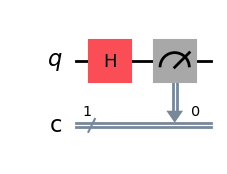

In [2]:
#Creamos el circuito: 1 qubit y 1 bit
circuito = QuantumCircuit(1,1)
#Añadimos puerta Hadamard
circuito.h(0)
#Medimos el qubit[0] en el bit[0]:
circuito.measure(0,0)
#Printeamos el circuito
circuito.draw('mpl')

In [3]:
#Cargamos la configuración con la API
configuracion = configparser.ConfigParser()
configuracion.read('config.ini')
api_key = configuracion['IBM']['api_key']

In [4]:
# Configuramos la apertura de la cuenta en IBM Quantum
QiskitRuntimeService.save_account(token=api_key, channel='ibm_quantum', overwrite=True)


In [ ]:
#Nos conectamos y seleccionamos el QPU como backend:
service = QiskitRuntimeService()
backend_name = 'ibm_brisbane'
backend = service.backend('ibm_brisbane')

In [7]:
#Transpilamos el circuito
circuito_transpilado = transpile(circuito, backend)

"""
El transpile “traduce” y ajusta para que encaje con las restricciones físicas y la topología del chip cuántico, 
reduciendo la complejidad y mejorando la fidelidad de la ejecución.
Para una ejecución en un backend simulado, no hace falta "transpilar" el circuito

"""

'\nEl transpile “traduce” y ajusta para que encaje con las restricciones físicas y la topología del chip cuántico, \nreduciendo la complejidad y mejorando la fidelidad de la ejecución.\nPara una ejecución en un backend simulado, no hace falta "transpilar" el circuito\n\n'

In [ ]:
from qiskit_ibm_runtime import Sampler

print(f"Se ha mandado el circuito a {backend_name} , esta celda puede tardar mas de 1 hora en terminar de ejecutarse, debido a la espera que debemos realizar en la QPU antes de su procesado. Puedes ver la QUEUE en el enlace proporcionado ")

sampler = Sampler(backend)  

job = sampler.run([circuito_transpilado])

result = job.result()

print("Resultados:", result.quasi_dists)

#Esperando la ejecución: el ID del job para su futura busqueda es: cz1hhrf1xvhg008dr11g

In [8]:
job_id = 'cz1hhrf1xvhg008dr11g'
job = service.job(job_id)
result = job.result()

counts = result[0].join_data().get_counts() ##aqui la solucion por fin

Enlace a IBM: https://quantum-computing.ibm.com



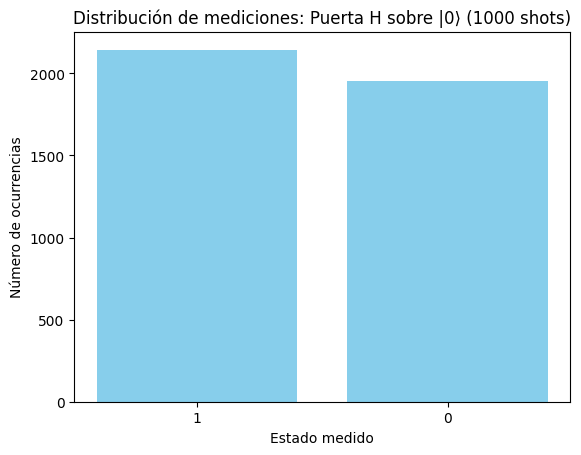

In [9]:
#Los graficamos..
labels = list(counts.keys())
values = list(counts.values())

plt.bar(labels, values, color='skyblue')
plt.xlabel('Estado medido')
plt.ylabel('Número de ocurrencias')
plt.title('Distribución de mediciones: Puerta H sobre |0⟩ (1000 shots)')
plt.show()

Resultados Obtenidos:

Teóricamente, la distribución tendría que ser uniforme. 50% para |0) y 50% para |1), pero debido al ruido de fondo, inestabilidad real de los qubits y decoherencia cuántica, podemos observar en el gráfico de barras que hay una ligera desviación.

Este exprimento logra representar con hechos reales como un solo qubit en superposición da lugar a una distribución equiprobable tras la medicíon y su colapso a un estado básico.

---

## Repitiendo el experimento, pero ahora en un Backend simulado, no en una QPU real.

Importamos librerias necesarias para el funcionamiento del backend simulado (Aer).

In [43]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

In [44]:
#Instanciamos el simulador
simulator = AerSimulator()

In [45]:
#Creamos el circuito. Hay que tener en cuenta que el simulador hace uso del hardware clásico, por lo tanto, la computación de un gran número de qubits puede no poder
#realizarse correctamente debido a limitaciones.

qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)

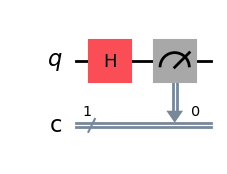

In [46]:
qc.draw('mpl')
#Podemos comprobar en la imagen de diseño del circuito, que disponemos de un qubit, 1 bit clásico, una puerta H y un medidor.

In [47]:
#Transpilamos el circuito..
qc_transpiled = transpile(qc,simulator)

In [48]:
#Ejecutamos la simulación, esta vez, vamos a disparar 1.000.000(millón) de shots:
job = simulator.run(qc_transpiled, shots = 1000000)
result = job.result()

In [49]:
#Obtenemos los conteos de la medición:
counts = result.get_counts()
print("Resultados de medición:", counts)

Resultados de medición: {'1': 500105, '0': 499895}


In [50]:
#Por ultimo graficamos los resultados. En un estado ideal, debería ser el resultado, un 50% para el estado básico |0), y un 50% para el estado básico |1).


# Cambiar etiquetas de los estados a notación cuántica
labels = {"0": "|0⟩", "1": "|1⟩"}
counts_qc = {labels[k]: v for k, v in counts.items()}

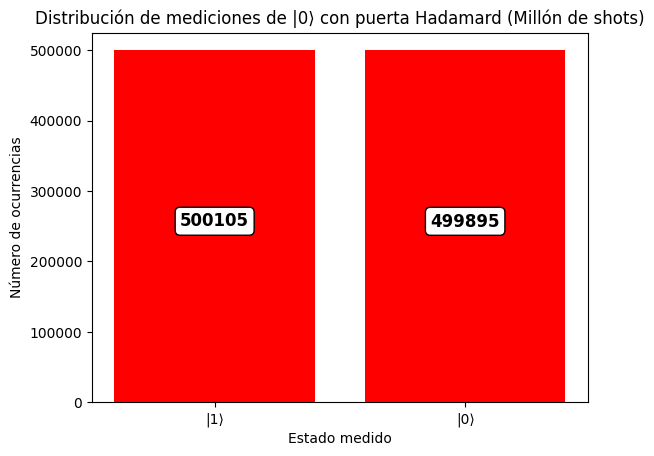

In [51]:
#Creando la gráfica...

plt.bar(counts_qc.keys(), counts_qc.values(), color='red')

# Agregar el número de mediciones para mjorar la visualización
for estado, valor in counts_qc.items():
    plt.text(estado, valor / 2, str(valor), fontsize=12, ha='center', fontweight='bold', color='black',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    

plt.xlabel('Estado medido')
plt.ylabel('Número de ocurrencias')
plt.title('Distribución de mediciones de |0⟩ con puerta Hadamard (Millón de shots)')


plt.show()


In [52]:
print(counts)
if counts['0'] > counts['1']:
    print(f'La desviación es de {counts['0']-counts['1']} veces')
else:
    print(f'La desviación es de {counts['1']-counts['0']} veces')


{'1': 500105, '0': 499895}
La desviación es de 210 veces


## Conclusión:

Al ejecutar un millón de veces el circuito, obtuvimos 499578 ocurrencias del estado |0) y 500422 del estado |1). La diferencia de n = 844 es el 0.0844%, que es el error que obtenemos, ahora de forma simulada claro, del ruido, inestabilidad de los qbits, decoherencia cuántica...

Esto se ajusta perfectamente a lo esperado, por lo que podemos decir que el qubit colapsa casi perfectamente al 50% en cada estado básico.

Como dice un qubit timido en superposición: si me miran me colapso..

A reir y que la incertidumbre te acompañe!



![Imagen introduccion](assets/flag.png
)

> Barcelona, 1 de Marzo de 2025